**Learning Embedded Stochastic Approximation**

Instance: LandS

In [2]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import copy 
import random
import time
# import the Model class from docplex.mp
from docplex.mp.model import Model

In [10]:
import utils
import sa_landS

**Function Value Approximation**

In [4]:
# load landS file 
landS_data = pd.read_csv('/Users/sonny/Documents/Courses/CSCI566/experiment/training_set/landS_sample5.csv')
# split the data file 
landS_train, landS_val = train_test_split(landS_data, test_size=0.2)

In [5]:
# data preprocessing 
# pad zeros
# 5 channels for x and 5 channels for omega 
n_x = 5
n_omega = 5

# landS
landS_train.to_numpy()
landS_val.to_numpy()

landS_train_pad_zero = np.zeros((landS_train.shape[0],n_x+n_omega+1))
landS_val_pad_zero = np.zeros((landS_val.shape[0],n_x+n_omega+1))

landS_train_pad_zero[:,:4] = landS_train.to_numpy()[:,:4]
landS_train_pad_zero[:,n_x] = landS_train.to_numpy()[:,4]
landS_train_pad_zero[:,-1] = landS_train.to_numpy()[:,-1]

landS_val_pad_zero[:,:4] = landS_val.to_numpy()[:,:4]
landS_val_pad_zero[:,n_x] = landS_val.to_numpy()[:,4]
landS_val_pad_zero[:,-1] = landS_val.to_numpy()[:,-1]

In [6]:
# set up data loader 
batch_size = 40
nworkers = 4

landS_train_data_loader = torch.utils.data.DataLoader(landS_train_pad_zero, batch_size=batch_size, shuffle=True, num_workers=nworkers)
landS_val_data_loader = torch.utils.data.DataLoader(landS_val_pad_zero, batch_size=batch_size, shuffle=True, num_workers=nworkers)

In [7]:
import torch.nn as nn

# Neural Network Architecture 1 
# Linear, output units: 40
# ReLU 
# Linear, output units: 1

class nn_m1(nn.Module):
    def __init__(self, nz):
        super(nn_m1, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(nz, 40, bias=True),
            nn.ReLU(),
            nn.Linear(40, 1, bias=True))
    
    def forward(self, x):
        return self.net(x)

# Neural Network Architecture 2
# Linear, output units: 40
# ReLU 
# Linear, output units: 80
# ReLU 
# Linear, output units: 40
# ReLU
# Linear, output units: 1
class nn_m2(nn.Module):
    def __init__(self, nz):
        super(nn_m2, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(nz, 40, bias=True),
            nn.ReLU(),
            nn.Linear(40, 80, bias=True),
            nn.ReLU(),
            nn.Linear(80, 40, bias=True),
            nn.ReLU(),
            nn.Linear(40, 1, bias=True))
    
    def forward(self, x):
        return self.net(x)
    

# Neural Network Architecture 3
# Linear, output units: 128
# LeakyReLU 
# Linear, output units: 256
# LeakyReLU 
# Linear, output units: 128
# LeakyReLU
# Linear, output units: 1
class nn_m3(nn.Module):
    def __init__(self, nz):
        super(nn_m3, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(nz, 128, bias=True),
            nn.LeakyReLU(),
            nn.Linear(128, 256, bias=True),
            nn.LeakyReLU(),
            nn.Linear(256, 128, bias=True),
            nn.LeakyReLU(),
            nn.Linear(128, 1, bias=True))
    
    def forward(self, x):
        return self.net(x)

In [8]:
# build model 
nz = n_x + n_omega
landS_model = nn_m3(nz)

# inirialize model hyperparameters 
model_parameter = {}
model_parameter['epoch'] = 30
model_parameter['learning_rate'] = 1e-4
model_parameter['output_model'] = '/Users/sonny/Documents/Courses/CSCI566/experiment2/landS_model.pt'

Run Epoch 0
It 0, L2 training loss: 84133.671875 
It 0, L2 validation loss: 93642.3515625 
It 50, L2 training loss: 94953.171875 
It 50, L2 validation loss: 91317.171875 
It 100, L2 training loss: 82828.546875 
It 100, L2 validation loss: 81847.4140625 
It 150, L2 training loss: 64304.1015625 
It 150, L2 validation loss: 56326.91015625 
Run Epoch 1
It 200, L2 training loss: 17127.70703125 
It 200, L2 validation loss: 21027.765625 
It 250, L2 training loss: 3239.207763671875 
It 250, L2 validation loss: 4208.94384765625 
It 300, L2 training loss: 2442.72119140625 
It 300, L2 validation loss: 3107.52685546875 
It 350, L2 training loss: 2956.252197265625 
It 350, L2 validation loss: 2845.94921875 
Run Epoch 2
It 400, L2 training loss: 2884.19482421875 
It 400, L2 validation loss: 2608.880859375 
It 450, L2 training loss: 2171.017578125 
It 450, L2 validation loss: 2382.32080078125 
It 500, L2 training loss: 2588.68896484375 
It 500, L2 validation loss: 2173.38916015625 
It 550, L2 trainin

It 4250, L2 training loss: 10.837650299072266 
It 4250, L2 validation loss: 13.457680702209473 
It 4300, L2 training loss: 8.757242202758789 
It 4300, L2 validation loss: 13.123364448547363 
It 4350, L2 training loss: 10.74664306640625 
It 4350, L2 validation loss: 12.515332221984863 
Run Epoch 22
It 4400, L2 training loss: 6.017741680145264 
It 4400, L2 validation loss: 12.125715255737305 
It 4450, L2 training loss: 10.598997116088867 
It 4450, L2 validation loss: 12.026256561279297 
It 4500, L2 training loss: 10.391814231872559 
It 4500, L2 validation loss: 11.4721097946167 
It 4550, L2 training loss: 15.908268928527832 
It 4550, L2 validation loss: 11.22995376586914 
Run Epoch 23
It 4600, L2 training loss: 6.210056304931641 
It 4600, L2 validation loss: 11.072134017944336 
It 4650, L2 training loss: 6.4482903480529785 
It 4650, L2 validation loss: 10.783961296081543 
It 4700, L2 training loss: 8.76054859161377 
It 4700, L2 validation loss: 10.365899085998535 
It 4750, L2 training lo

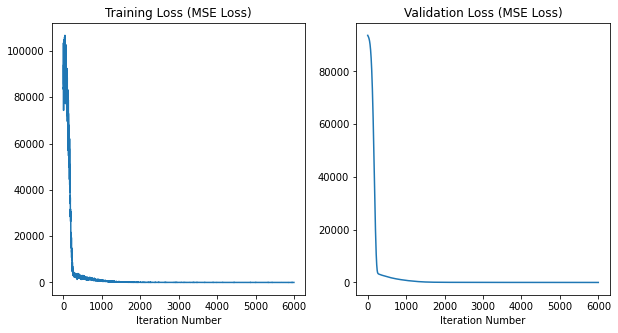

Model has been saved.


In [9]:
# train the model 
utils.normal_train(model_parameter, landS_model, landS_train_data_loader, landS_val_pad_zero)

Load the model

In [11]:
# load model 
nz = n_x + n_omega
model_path_landS = '/Users/sonny/Documents/Courses/CSCI566/experiment2/landS_model.pt' 
nn_landS_model_load = nn_m3(nz)
nn_landS_model_load.load_state_dict(torch.load(model_path_landS))
nn_landS_model_load.eval()

nn_m3(
  (net): Sequential(
    (0): Linear(in_features=10, out_features=128, bias=True)
    (1): LeakyReLU(negative_slope=0.01)
    (2): Linear(in_features=128, out_features=256, bias=True)
    (3): LeakyReLU(negative_slope=0.01)
    (4): Linear(in_features=256, out_features=128, bias=True)
    (5): LeakyReLU(negative_slope=0.01)
    (6): Linear(in_features=128, out_features=1, bias=True)
  )
)

In [13]:
# test on benchmark_sample2tensor_landS
benchmark_sample_set = sa_landS.benchmark_sample2tensor_landS(1000)

**random seed = 123**

In [15]:
# test on vanilla LESA
x = np.ones(4) * 10
x_proj = sa_landS.projection_landS(x)
print('x_proj')
print(x_proj)
x_est_lesa, x_record_lesa = sa_landS.lesa_landS(x_proj, nn_landS_model_load, dataset=benchmark_sample_set)

x_proj
[3.87755092 5.71428565 0.20408174 6.32653056]
************************************
Vanilla LESA landS
************************************
it: 1
Using backtrack line search
directional_directive: -286.956787109375
Debug Mode(backtrack_line_search) Aplha is found!
alpha: 1.0
Debug Mode(backtrack_line_search) f1: 371.47607421875
Debug Mode(backtrack_line_search) f2 + c * alpha * directional_directive: 413.7770080566406
Stepsize: 1.0
Before projection
[-3.12244908 -1.28571435 -4.79591826  0.32653056]
After projection
[2.0969387  3.93367343 0.42346954 5.54591833]
it: 2
Using backtrack line search
directional_directive: -186.85911560058594
Debug Mode(backtrack_line_search) Aplha is not found!
Return the last stepsize in backtrack line search
Stepsize: 0.011529215046068483
Before projection
[2.05082184 3.86449813 0.40041111 5.47674304]
After projection
[2.10270334 3.91637964 0.45229263 5.52862455]
it: 3
Using backtrack line search
directional_directive: -28.259275436401367
Debug Mode(

[2.6816902  3.24098363 3.40322529 2.67410094]
it: 28
Not using backtrack line search
Stepsize: 0.03571428571428571
Before projection
[2.34240449 2.99098363 3.02108243 2.45981523]
After projection
[2.63883305 3.28741224 3.31751091 2.75624385]
it: 29
Not using backtrack line search
Stepsize: 0.034482758620689655
Before projection
[2.67331581 3.25292948 3.42095919 2.5493473 ]
After projection
[2.69694038 3.3034044  3.39088307 2.60877234]
it: 30
Not using backtrack line search
Stepsize: 0.03333333333333333
Before projection
[2.73027372 3.27007106 3.49088307 2.40877234]
After projection
[2.74920374 3.36184046 3.36413435 2.52482152]
it: 31
Not using backtrack line search
Stepsize: 0.03225806451612903
Before projection
[2.55565535 3.16829207 3.23510209 2.33127314]
After projection
[2.73141534 3.36396454 3.3710371  2.5335831 ]
it: 32
Not using backtrack line search
Stepsize: 0.03125
Before projection
[2.76266534 3.33271454 3.4647871  2.3460831 ]
After projection
[2.78041226 3.4187484  3.345960

[2.69312868 3.7081086  3.29781125 2.30095158]
it: 58
Not using backtrack line search
Stepsize: 0.017241379310344827
Before projection
[2.5896804  3.60466032 3.22884574 2.19750331]
After projection
[2.68450799 3.69948808 3.323673   2.29233112]
it: 59
Not using backtrack line search
Stepsize: 0.01694915254237288
Before projection
[2.58281308 3.59779316 3.25587639 2.19063621]
After projection
[2.67603338 3.691014   3.34909562 2.28385722]
it: 60
Not using backtrack line search
Stepsize: 0.016666666666666666
Before projection
[2.57603338 3.591014   3.28242895 2.18385722]
After projection
[2.66731135 3.68695627 3.36437831 2.28135427]
it: 61
Not using backtrack line search
Stepsize: 0.01639344262295082
Before projection
[2.51157365 3.57220217 3.18896848 2.18299361]
After projection
[2.64763919 3.70826783 3.3250338  2.31905931]
it: 62
Not using backtrack line search
Stepsize: 0.016129032258064516
Before projection
[2.53473597 3.5953646  3.19277573 2.22228511]
After projection
[2.64844564 3.709

[2.66945635 3.82073498 3.30515277 2.20465619]
it: 88
Not using backtrack line search
Stepsize: 0.011363636363636364
Before projection
[2.58991089 3.74118952 3.21197095 2.13647438]
After projection
[2.67002451 3.82130323 3.29208438 2.21658811]
it: 89
Not using backtrack line search
Stepsize: 0.011235955056179775
Before projection
[2.59137282 3.74265154 3.19994954 2.14917238]
After projection
[2.6705863  3.82186509 3.27916287 2.22838596]
it: 90
Not using backtrack line search
Stepsize: 0.011111111111111112
Before projection
[2.60391963 3.75519843 3.23471842 2.1617193 ]
After projection
[2.66503076 3.81630965 3.29582935 2.22283055]
it: 91
Not using backtrack line search
Stepsize: 0.01098901098901099
Before projection
[2.58810768 3.73938657 3.20571946 2.15689648]
After projection
[2.66558018 3.81685915 3.28319181 2.23436909]
it: 92
Not using backtrack line search
Stepsize: 0.010869565217391304
Before projection
[2.60036279 3.75164176 3.23971355 2.1691517 ]
After projection
[2.66014541 3.81

In [16]:
# test on SA 
x_est_sa, x_record_sa = sa_landS.sa_landS(x_init=x_proj)

************************************
Vanilla SA LandS
************************************
it: 1
Stepsize: 1.0
Before projection
[-3.12244908 -1.28571435 -4.79591826  0.32653056]
After projection
[2.0969387  3.93367343 0.42346954 5.54591833]
it: 2
Stepsize: 0.5
Before projection
[ 0.0969387   0.93367343 -0.57653046  2.54591833]
After projection
[2.3469387  3.18367343 1.67346954 4.79591834]
it: 3
Stepsize: 0.3333333333333333
Before projection
[2.68027203 2.85034009 2.67346954 2.79591834]
After projection
[2.93027205 3.10034012 2.92346953 3.04591837]
it: 4
Stepsize: 0.25
Before projection
[1.18027205 1.35034012 1.67346953 1.54591837]
After projection
[2.74277203 2.91284011 3.23596951 3.10841835]
it: 5
Stepsize: 0.2
Before projection
[2.94277203 2.71284011 3.83596951 1.90841835]
After projection
[3.06358017 3.18395064 3.25617285 2.49629635]
it: 6
Stepsize: 0.16666666666666666
Before projection
[1.48024683 2.01728397 1.47283952 1.49629635]
After projection
[2.86358016 3.4006173  2.85617285

it: 35
Stepsize: 0.02857142857142857
Before projection
[2.48043434 3.59695206 3.201562   2.09248027]
After projection
[2.63757716 3.7540954  3.35870377 2.24962379]
it: 36
Stepsize: 0.027777777777777776
Before projection
[2.66535493 3.72631762 3.44203711 2.08295712]
After projection
[2.6815767  3.79787814 3.34758135 2.1729639 ]
it: 37
Stepsize: 0.02702702702702703
Before projection
[2.51941454 3.63571598 3.23947325 2.01080173]
After projection
[2.6666729  3.7996578  3.35336468 2.18030471]
it: 38
Stepsize: 0.02631578947368421
Before projection
[2.50877816 3.64176307 3.24810152 2.02240998]
After projection
[2.65216131 3.80139054 3.35899603 2.18745222]
it: 39
Stepsize: 0.02564102564102564
Before projection
[2.67780233 3.77574951 3.4359191  2.03360607]
After projection
[2.69236391 3.84634135 3.33842015 2.12287467]
it: 40
Stepsize: 0.025
Before projection
[2.54236391 3.69634135 3.23842015 1.97287467]
After projection
[2.6785779  3.84798757 3.34376966 2.12966497]
it: 41
Stepsize: 0.0243902439

it: 69
Stepsize: 0.014492753623188406
Before projection
[2.6489893  3.96949667 3.39128032 1.94675567]
After projection
[2.65721975 4.00939641 3.33617216 1.99721186]
it: 70
Stepsize: 0.014285714285714285
Before projection
[2.55721975 3.90939641 3.26474359 1.91149757]
After projection
[2.64599103 4.00434095 3.34116835 2.00849986]
it: 71
Stepsize: 0.014084507042253521
Before projection
[2.66007553 3.99025644 3.38342187 1.92399282]
After projection
[2.66807418 4.02903192 3.32986683 1.97302725]
it: 72
Stepsize: 0.013888888888888888
Before projection
[2.61251862 3.94569859 3.30208905 1.88969392]
After projection
[2.67356114 4.02423088 3.32815202 1.97405614]
it: 73
Stepsize: 0.0136986301369863
Before projection
[2.57767072 3.92834047 3.25965886 1.89186436]
After projection
[2.66279388 4.01938315 3.33294294 1.98488023]
it: 74
Stepsize: 0.013513513513513514
Before projection
[2.56819928 3.92478856 3.22213213 1.90379915]
After projection
[2.66346952 4.02005918 3.3174016  1.9990699 ]
it: 75
Steps

In [18]:
path = '/Users/sonny/Documents/Courses/CSCI566/experiment2/seed123/x_record_lesa_landS.txt'
utils.save_solution(x_record_lesa, path)

In [19]:
path = '/Users/sonny/Documents/Courses/CSCI566/experiment2/seed123/x_record_sa_landS.txt'
utils.save_solution(x_record_sa, path)

**random seed = 5**

In [20]:
# test on vanilla LESA
x = np.ones(4) * 10
x_proj = sa_landS.projection_landS(x)
print('x_proj')
print(x_proj)
x_est_lesa, x_record_lesa = sa_landS.lesa_landS(x_proj, nn_landS_model_load, dataset=benchmark_sample_set, _seed=5)

x_proj
[3.87755092 5.71428565 0.20408174 6.32653056]
************************************
Vanilla LESA landS
************************************
it: 1
Using backtrack line search
directional_directive: -201.96531677246094
Debug Mode(backtrack_line_search) Aplha is found!
alpha: 1.0
Debug Mode(backtrack_line_search) f1: 376.2737731933594
Debug Mode(backtrack_line_search) f2 + c * alpha * directional_directive: 413.86199951171875
Stepsize: 1.0
Before projection
[-0.12244908 -0.28571435 -1.79591826  0.32653056]
After projection
[3.3469387  3.18367343 1.67346952 3.79591834]
it: 2
Using backtrack line search
directional_directive: -21.331785202026367
Debug Mode(backtrack_line_search) Aplha is not found!
Return the last stepsize in backtrack line search
Stepsize: 0.011529215046068483
Before projection
[3.35846792 3.17214422 1.70805717 3.72674305]
After projection
[3.36711499 3.18079129 1.71670424 3.73539013]
it: 3
Using backtrack line search
directional_directive: -21.331785202026367
Debug 

[3.04179189 3.71586121 2.93949216 2.30285479]
it: 28
Not using backtrack line search
Stepsize: 0.03571428571428571
Before projection
[3.07750617 3.68014693 3.04663502 2.08856907]
After projection
[3.10429206 3.70693287 3.0734208  2.11535504]
it: 29
Not using backtrack line search
Stepsize: 0.034482758620689655
Before projection
[2.77670585 3.46555356 2.70445528 1.90845849]
After projection
[3.06291257 3.75176029 2.99066196 2.19466522]
it: 30
Not using backtrack line search
Stepsize: 0.03333333333333333
Before projection
[2.7462459  3.51842696 2.74066196 1.99466522]
After projection
[2.9962459  3.76842697 2.99066193 2.24466525]
it: 31
Not using backtrack line search
Stepsize: 0.03225806451612903
Before projection
[3.02850397 3.73616891 3.08743612 2.05111686]
After projection
[3.0526977  3.76036271 3.11162973 2.07531069]
it: 32
Not using backtrack line search
Stepsize: 0.03125
Before projection
[3.0839477  3.72911271 3.20537973 1.88781069]
After projection
[3.1054498  3.77383775 3.180435

[2.9168426  3.84459441 3.24880329 1.98975984]
it: 58
Not using backtrack line search
Stepsize: 0.017241379310344827
Before projection
[2.75304949 3.72390475 3.06432053 1.88631157]
After projection
[2.89615293 3.86700828 3.20742377 2.02941514]
it: 59
Not using backtrack line search
Stepsize: 0.01694915254237288
Before projection
[2.91310208 3.85005913 3.25827122 1.92772022]
After projection
[2.92467876 3.87525882 3.24260189 1.95746092]
it: 60
Not using backtrack line search
Stepsize: 0.016666666666666666
Before projection
[2.76634543 3.75859215 3.06426856 1.85746092]
After projection
[2.90467868 3.89692551 3.20260161 1.99579431]
it: 61
Not using backtrack line search
Stepsize: 0.01639344262295082
Before projection
[2.83910491 3.79856486 3.16981472 1.89743366]
After projection
[2.91287531 3.8723369  3.24358183 1.97120626]
it: 62
Not using backtrack line search
Stepsize: 0.016129032258064516
Before projection
[2.84835919 3.77556271 3.21132377 1.87443206]
After projection
[2.91941325 3.864

[2.84334391 3.9145697  3.25908136 1.98300532]
it: 88
Not using backtrack line search
Stepsize: 0.011363636363636364
Before projection
[2.79788936 3.84638788 3.23635409 1.9148235 ]
After projection
[2.84833214 3.90515367 3.27015084 1.97636363]
it: 89
Not using backtrack line search
Stepsize: 0.011235955056179775
Before projection
[2.76968045 3.82650198 3.21397106 1.9089479 ]
After projection
[2.83950056 3.90117739 3.27408055 1.98524175]
it: 90
Not using backtrack line search
Stepsize: 0.011111111111111112
Before projection
[2.79505611 3.83451073 3.25185833 1.91857509]
After projection
[2.84389016 3.89733608 3.27270976 1.98606421]
it: 91
Not using backtrack line search
Stepsize: 0.01098901098901099
Before projection
[2.76696709 3.820413   3.2177647  1.92013015]
After projection
[2.83525268 3.89344742 3.27655266 1.99474751]
it: 92
Not using backtrack line search
Stepsize: 0.010869565217391304
Before projection
[2.75916572 3.81736046 3.22220483 1.92953012]
After projection
[2.82670911 3.88

In [21]:
x_est_sa, x_record_sa = sa_landS.sa_landS(x_init=x_proj, _seed=5)

************************************
Vanilla SA LandS
************************************
it: 1
Stepsize: 1.0
Before projection
[-0.12244908 -0.28571435 -1.79591826  0.32653056]
After projection
[3.3469387  3.18367343 1.67346952 3.79591834]
it: 2
Stepsize: 0.5
Before projection
[3.8469387  2.68367343 3.17346952 0.79591834]
After projection
[4.19135795 3.39506175 2.78395062 1.62962969]
it: 3
Stepsize: 0.3333333333333333
Before projection
[ 2.85802461  1.39506175  2.11728396 -0.37037031]
After projection
[4.32304519 3.2798354  2.74279838 1.65432103]
it: 4
Stepsize: 0.25
Before projection
[2.82304519 1.7798354  1.74279838 0.15432103]
After projection
[4.1851851  3.29629631 2.79629632 1.72222227]
it: 5
Stepsize: 0.2
Before projection
[3.3851851  2.09629631 2.39629632 0.52222227]
After projection
[4.26419745 3.2271605  2.77160497 1.73703709]
it: 6
Stepsize: 0.16666666666666666
Before projection
[3.26419745 2.2271605  2.1049383  0.73703709]
After projection
[4.17229073 3.23813444 2.80727025

it: 35
Stepsize: 0.02857142857142857
Before projection
[3.02399286 3.54363991 2.98068389 1.73739777]
After projection
[3.20204975 3.72787114 3.14639208 1.92368712]
it: 36
Stepsize: 0.027777777777777776
Before projection
[3.0076053  3.5334267  3.00750319 1.75702045]
After projection
[3.1802162  3.71804012 3.15610904 1.94563472]
it: 37
Stepsize: 0.02702702702702703
Before projection
[2.92345944 3.52885093 2.86691985 1.78347256]
After projection
[3.14778376 3.7531753  3.09124405 2.00779695]
it: 38
Stepsize: 0.02631578947368421
Before projection
[3.17409955 3.72685951 3.17019142 1.84990222]
After projection
[3.19210298 3.76566439 3.14659194 1.89564092]
it: 39
Stepsize: 0.02564102564102564
Before projection
[3.0126158  3.58617721 3.01838681 1.74179477]
After projection
[3.17194888 3.75658977 3.15556095 1.91590049]
it: 40
Stepsize: 0.025
Before projection
[3.07194888 3.60658977 3.10556095 1.76590049]
After projection
[3.18182543 3.74794765 3.15247485 1.91775214]
it: 41
Stepsize: 0.0243902439

it: 69
Stepsize: 0.014492753623188406
Before projection
[2.81758325 3.75238731 2.99595078 1.95291936]
After projection
[2.9378731  3.8726772  3.11624055 2.07320927]
it: 70
Stepsize: 0.014285714285714285
Before projection
[2.95215882 3.85839149 3.1590977  1.98749498]
After projection
[2.96287356 3.86910634 3.16981222 1.99820988]
it: 71
Stepsize: 0.014084507042253521
Before projection
[2.82907075 3.77051479 3.01910799 1.91370284]
After projection
[2.94597168 3.88741577 3.13600884 2.03060383]
it: 72
Stepsize: 0.013888888888888888
Before projection
[2.95986057 3.87352689 3.1776755  1.9472705 ]
After projection
[2.97027773 3.88394424 3.18809228 1.95768792]
it: 73
Stepsize: 0.0136986301369863
Before projection
[2.91548321 3.80175246 3.16069502 1.87549614]
After projection
[2.97712496 3.86341406 3.22229707 1.93716437]
it: 74
Stepsize: 0.013513513513513514
Before projection
[2.92307091 3.78233298 3.19527004 1.85608329]
After projection
[2.9824846  3.85851124 3.22115459 1.93784974]
it: 75
Steps

In [22]:
path = '/Users/sonny/Documents/Courses/CSCI566/experiment2/seed5/x_record_lesa_landS.txt'
utils.save_solution(x_record_lesa, path)

In [23]:
path = '/Users/sonny/Documents/Courses/CSCI566/experiment2/seed5/x_record_sa_landS.txt'
utils.save_solution(x_record_sa, path)

**random seed = 37**

In [24]:
# test on vanilla LESA
x = np.ones(4) * 10
x_proj = sa_landS.projection_landS(x)
print('x_proj')
print(x_proj)
x_est_lesa, x_record_lesa = sa_landS.lesa_landS(x_proj, nn_landS_model_load, dataset=benchmark_sample_set, _seed=37)

x_proj
[3.87755092 5.71428565 0.20408174 6.32653056]
************************************
Vanilla LESA landS
************************************
it: 1
Using backtrack line search
directional_directive: -201.96531677246094
Debug Mode(backtrack_line_search) Aplha is found!
alpha: 1.0
Debug Mode(backtrack_line_search) f1: 376.2737731933594
Debug Mode(backtrack_line_search) f2 + c * alpha * directional_directive: 413.86199951171875
Stepsize: 1.0
Before projection
[-0.12244908 -0.28571435 -1.79591826  0.32653056]
After projection
[3.3469387  3.18367343 1.67346952 3.79591834]
it: 2
Using backtrack line search
directional_directive: -289.642333984375
Debug Mode(backtrack_line_search) Aplha is not found!
Return the last stepsize in backtrack line search
Stepsize: 0.011529215046068483
Before projection
[3.2662342  3.10296893 1.61582345 3.72674305]
After projection
[3.33829181 3.17502654 1.68788106 3.79880067]
it: 3
Using backtrack line search
directional_directive: -253.11277770996094
Debug Mo

[3.05147293 3.12256127 3.26715445 2.55881141]
it: 28
Not using backtrack line search
Stepsize: 0.03571428571428571
Before projection
[2.83718722 2.90827555 3.12429731 2.3445257 ]
After projection
[3.03177864 3.12491283 3.274797   2.5685116 ]
it: 29
Not using backtrack line search
Stepsize: 0.034482758620689655
Before projection
[2.70419243 2.88353352 2.90583148 2.36161504]
After projection
[2.99039932 3.16974045 3.19203828 2.64782199]
it: 30
Not using backtrack line search
Stepsize: 0.03333333333333333
Before projection
[2.79039932 2.96974045 3.05870495 2.44782199]
After projection
[2.97373265 3.15307388 3.24203811 2.63115544]
it: 31
Not using backtrack line search
Stepsize: 0.03225806451612903
Before projection
[2.66728104 2.92726742 2.89687682 2.43760706]
After projection
[2.93502297 3.19500938 3.16461869 2.70534902]
it: 32
Not using backtrack line search
Stepsize: 0.03125
Before projection
[2.74752297 3.00750938 3.03961869 2.51784902]
After projection
[2.91939797 3.17938443 3.211493

[2.85111757 3.45849696 3.27921416 2.41117149]
it: 58
Not using backtrack line search
Stepsize: 0.017241379310344827
Before projection
[2.68732446 3.33780731 3.09473141 2.30772321]
After projection
[2.83042789 3.48091079 3.23783472 2.45082671]
it: 59
Not using backtrack line search
Stepsize: 0.01694915254237288
Before projection
[2.72873297 3.37921587 3.17003811 2.3491318 ]
After projection
[2.82195333 3.47243631 3.26325829 2.44235226]
it: 60
Not using backtrack line search
Stepsize: 0.016666666666666666
Before projection
[2.66361999 3.35576964 3.08492495 2.34235226]
After projection
[2.8019533  3.494103   3.22325818 2.48068563]
it: 61
Not using backtrack line search
Stepsize: 0.01639344262295082
Before projection
[2.70359265 3.39574234 3.15768441 2.38232498]
After projection
[2.7937566  3.48590635 3.24784824 2.472489  ]
it: 62
Not using backtrack line search
Stepsize: 0.016129032258064516
Before projection
[2.6969824  3.38913215 3.18333211 2.37571481]
After projection
[2.78569208 3.477

[2.68734457 3.53562453 3.37149853 2.40553301]
it: 88
Not using backtrack line search
Stepsize: 0.011363636363636364
Before projection
[2.57939003 3.45607908 3.24990762 2.33735119]
After projection
[2.67370808 3.55039731 3.34422532 2.43166948]
it: 89
Not using backtrack line search
Stepsize: 0.011235955056179775
Before projection
[2.68494404 3.53916135 3.37793319 2.36425375]
After projection
[2.69261109 3.55594878 3.36735947 2.38408132]
it: 90
Not using backtrack line search
Stepsize: 0.011111111111111112
Before projection
[2.7037222  3.54483767 3.4006928  2.31741465]
After projection
[2.71003215 3.57542698 3.35844403 2.35609708]
it: 91
Not using backtrack line search
Stepsize: 0.01098901098901099
Before projection
[2.72102116 3.56443797 3.39141106 2.29016302]
After projection
[2.72726184 3.59469167 3.34962568 2.32842106]
it: 92
Not using backtrack line search
Stepsize: 0.010869565217391304
Before projection
[2.7381314  3.5838221  3.38223438 2.26320367]
After projection
[2.74430424 3.61

In [25]:
x_est_sa, x_record_sa = sa_landS.sa_landS(x_init=x_proj, _seed=37)

************************************
Vanilla SA LandS
************************************
it: 1
Stepsize: 1.0
Before projection
[-0.12244908 -0.28571435 -1.79591826  0.32653056]
After projection
[3.3469387  3.18367343 1.67346952 3.79591834]
it: 2
Stepsize: 0.5
Before projection
[-0.1530613  -0.31632657 -0.82653048  0.79591834]
After projection
[2.9719387  2.80867344 2.29846951 3.92091835]
it: 3
Stepsize: 0.3333333333333333
Before projection
[0.9719387  0.80867344 0.96513618 1.92091835]
After projection
[2.80527203 2.64200678 2.79846951 3.75425169]
it: 4
Stepsize: 0.25
Before projection
[3.05527203 2.39200678 3.54846951 2.25425169]
After projection
[3.22256508 2.80178329 3.23079562 2.74485603]
it: 5
Stepsize: 0.2
Before projection
[3.42256508 2.60178329 3.83079562 1.54485603]
After projection
[3.53614533 3.15240057 3.0703018  2.24115231]
it: 6
Stepsize: 0.16666666666666666
Before projection
[2.53614533 2.15240057 2.40363514 1.24115231]
After projection
[3.4442386  3.16337452 3.10596707

it: 35
Stepsize: 0.02857142857142857
Before projection
[2.92559476 3.79796995 3.19487325 1.99584785]
After projection
[2.94702353 3.819399   3.21630147 2.017277  ]
it: 36
Stepsize: 0.027777777777777776
Before projection
[2.68313464 3.62495455 2.91907925 1.85061033]
After projection
[2.91368996 3.85550991 3.14963448 2.08116571]
it: 37
Stepsize: 0.02702702702702703
Before projection
[2.7515278  3.69334775 3.04152637 1.91900355]
After projection
[2.90017645 3.84199647 3.19017488 2.0676523 ]
it: 38
Stepsize: 0.02631578947368421
Before projection
[2.65017645 3.65778595 2.90859594 1.90975756]
After projection
[2.86859749 3.87620702 3.12701691 2.12817864]
it: 39
Stepsize: 0.02564102564102564
Before projection
[2.71475134 3.72236086 3.02445281 1.97433249]
After projection
[2.85577698 3.86338655 3.16547838 2.1153582 ]
it: 40
Stepsize: 0.025
Before projection
[2.61827698 3.68838655 2.89797838 1.9653582 ]
After projection
[2.82577697 3.89588657 3.10547831 2.17285822]
it: 41
Stepsize: 0.0243902439

it: 69
Stepsize: 0.014492753623188406
Before projection
[2.63496771 3.84941416 3.18905515 2.00772256]
After projection
[2.71467787 3.92912441 3.26876509 2.08743285]
it: 70
Stepsize: 0.014285714285714285
Before projection
[2.62896358 3.84341013 3.21162224 2.00171857]
After projection
[2.707535   3.9219817  3.29019334 2.0802902 ]
it: 71
Stepsize: 0.014084507042253521
Before projection
[2.62302796 3.83747466 3.23385531 1.99578315]
After projection
[2.70049272 3.91493977 3.31131938 2.07324838]
it: 72
Stepsize: 0.013888888888888888
Before projection
[2.61715939 3.83160643 3.25576383 1.98991505]
After projection
[2.69353073 3.90818872 3.33171328 2.06656766]
it: 73
Stepsize: 0.0136986301369863
Before projection
[2.56339374 3.81229831 3.18513793 1.98437588]
After projection
[2.67709231 3.925997   3.29883622 2.09807462]
it: 74
Stepsize: 0.013513513513513514
Before projection
[2.58249771 3.83140241 3.18802541 2.01699354]
After projection
[2.67776798 3.92667278 3.28329548 2.11226395]
it: 75
Steps

In [26]:
path = '/Users/sonny/Documents/Courses/CSCI566/experiment2/seed37/x_record_lesa_landS.txt'
utils.save_solution(x_record_lesa, path)

In [27]:
path = '/Users/sonny/Documents/Courses/CSCI566/experiment2/seed37/x_record_sa_landS.txt'
utils.save_solution(x_record_sa, path)